In [1]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms with Python"
# by
# Chanchal Chatterjee
# December 2021
#
# Experiments for Chapter 8 (e-shop-clothing-2008.csv Data)
# Sentiment analysis
#
# Author: Chanchal Chatterjee
#

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


In [3]:
# Data obtained from UCI clickstream dataset for online shopping 
# https://archive.ics.uci.edu/ml/datasets/clickstream+data+for+online+shopping
# Load data into your unique bucket. 
# Here AdaptiveMLAlgorithms/Data/e-shop-clothing-2008.csv

In [4]:
dataset = pd.read_csv("../Data/e-shop-clothing-2008.csv")
dataset = dataset.dropna()
dataset = dataset.drop(['year','month','day','sessionID','clothing_model'], 1)
print(dataset.shape)
print(dataset.head())


(165474, 9)
   order  country  main_category  colour  location  model photography  price  \
0      1       29              1       1         5                  1     28   
1      2       29              1       1         6                  1     33   
2      3       29              2      10         2                  1     52   
3      4       29              2       6         6                  2     38   
4      5       29              2       4         3                  2     52   

   price2  page  
0       2     1  
1       2     1  
2       1     1  
3       2     1  
4       1     1  


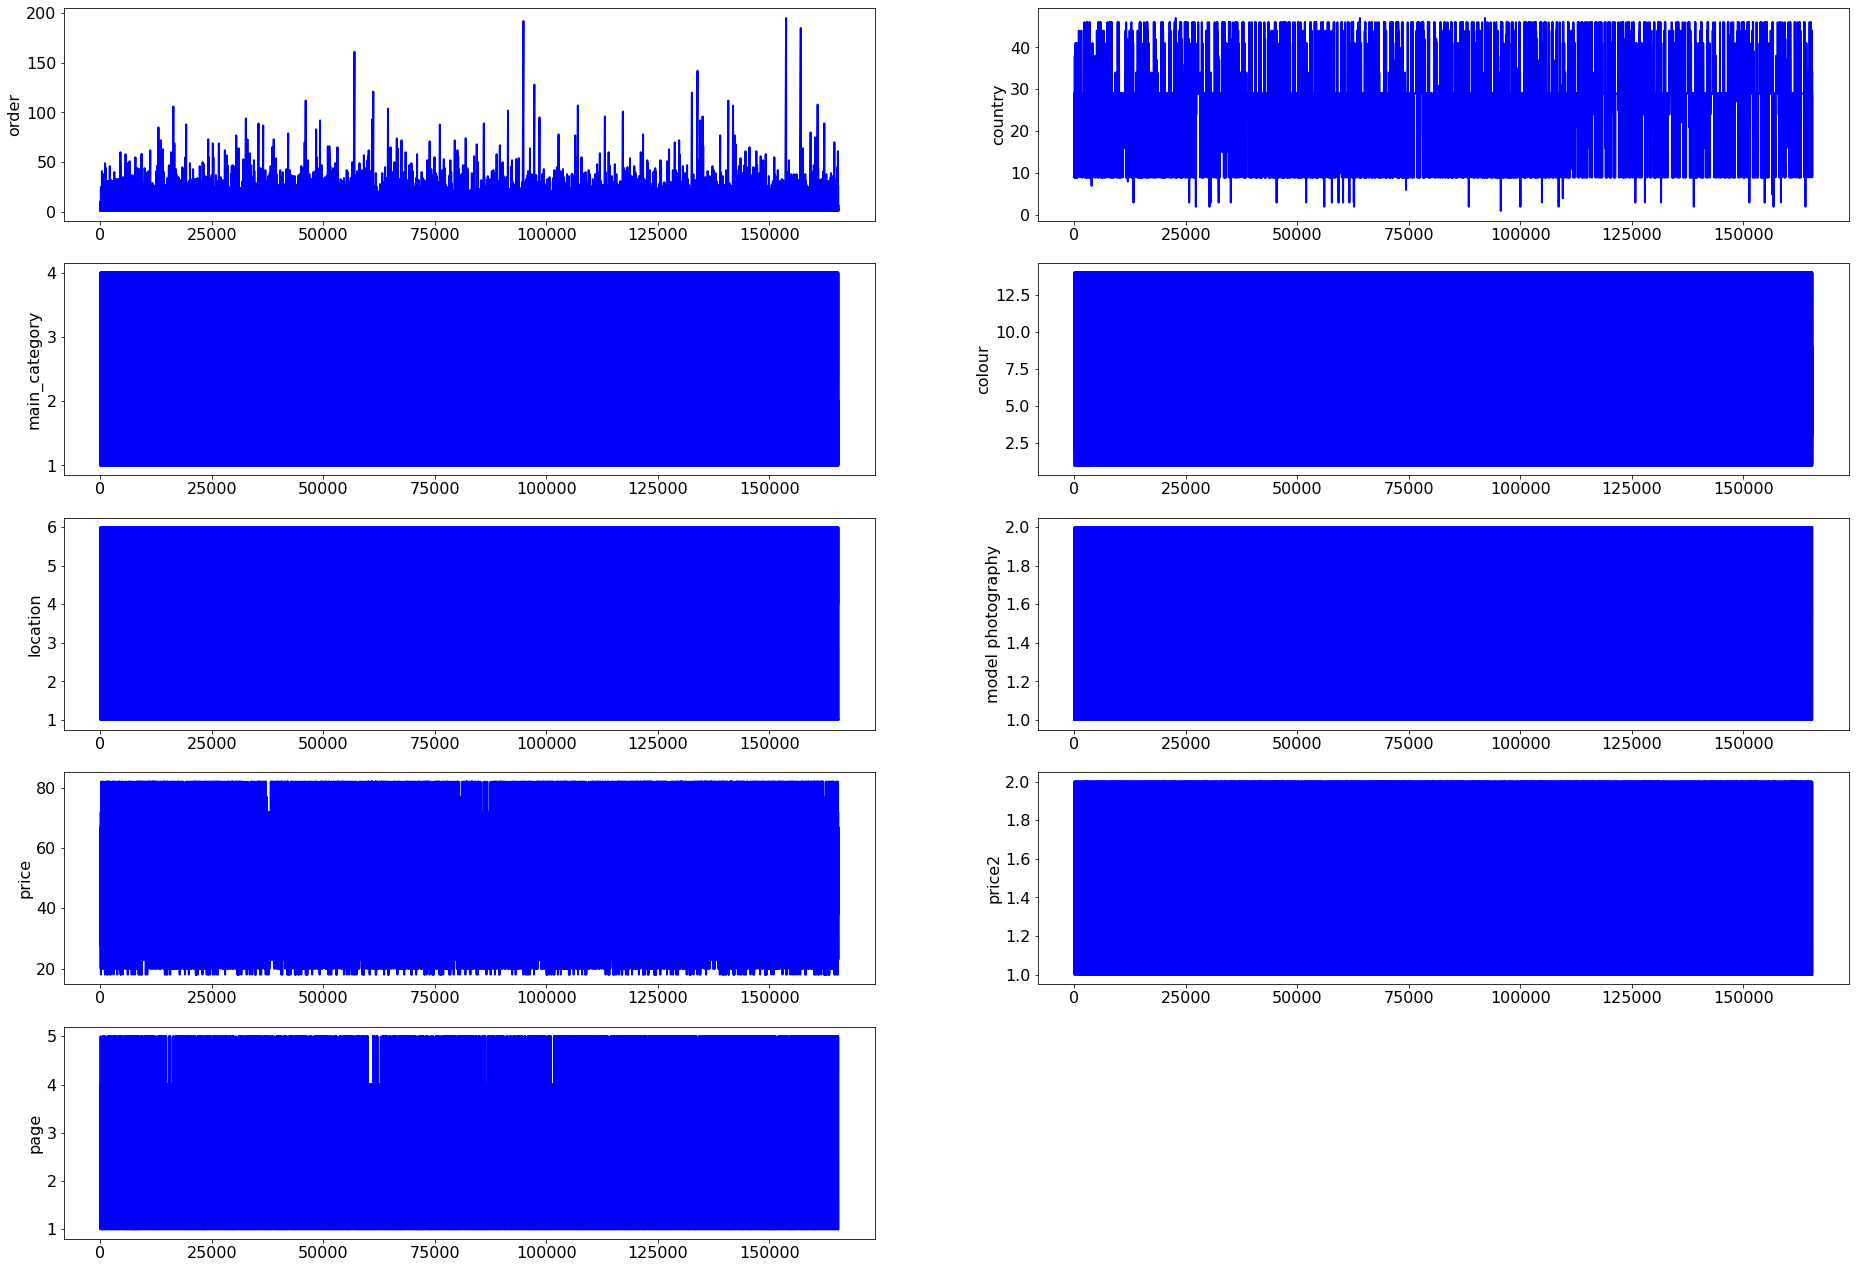

In [5]:
plt.figure(figsize=(32, 32))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns
for i in range(dataset.shape[1]):
    plt.subplot(7, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset[cols[i]], lw=2, color='b')
plt.show()


--------------------------------------------------------------
### Adaptive Linear Eigen Decomposition for Sentiment Analysis

In [6]:
# Square root of the correlation matrix
from scipy.linalg import eigh

X = dataset.T
nSamples = dataset.shape[0]

# Compute Correlation matrix and eigen vectors of the generated data
corX = (X @ X.T) / nSamples

# Eigenvalues and eigenvectors of corX
eigvals, eigvecs = eigh(corX)
print("eigvals =\n", eigvals[::-1])

EstV = np.fliplr(eigvecs)
EstD  = np.diag(eigvals[::-1])


eigvals =
 [2.92230613e+03 1.85469778e+02 8.40672651e+01 1.92846919e+01
 3.38296222e+00 1.50244904e+00 7.10129289e-01 3.39779207e-01
 1.59302655e-01]


In [7]:
# Adaptive algorithm
from numpy import linalg as la

nSamples = dataset.shape[0]
nDim = dataset.shape[1]

A = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
N = np.zeros(shape=(1,nDim)) # stores eigen norms
W = 0.1 * np.ones(shape=(nDim,nDim)) # stores adaptive eigenvectors
for iter in range(nSamples):
    cnt = iter + 1
    x = np.array(dataset.iloc[iter])
    x = x.reshape(nDim,1)
    A = A + (1.0/cnt)*((np.dot(x, x.T)) - A)
    etat = 1.0/(10000 + cnt)
    # Deflated Gradient Descent
    W = W + etat*(A @ W - 0.5*W @ np.triu(W.T @ A @ W) - 0.5*A @ W @ np.triu(W.T @ W))
    newnorm = la.norm(W, axis=0)
    N = np.vstack([N, newnorm])
print("W=\n", W)


W=
 [[ 0.18529643  0.97631414  0.10161502 -0.03824329 -0.01221379 -0.00748514
  -0.00479546 -0.0035982  -0.00304989]
 [ 0.49536741 -0.01631742 -0.84299096 -0.17952026 -0.06810289 -0.04343499
  -0.02685004 -0.01904315 -0.01507725]
 [ 0.04238973  0.01994296 -0.0684788   0.07933911  0.10034887  0.06981632
   0.04536341  0.03696804  0.03538778]
 [ 0.11237671  0.0258873  -0.12538044  0.97490161 -0.07993499 -0.07532834
  -0.0339926  -0.01592933 -0.00774693]
 [ 0.05857504  0.00599179 -0.04719498  0.06086398  0.90711756  0.61742576
   0.34977158  0.22186003  0.15498903]
 [ 0.02254062  0.00404219 -0.0215959   0.02044713  0.06718282  0.04671335
   0.02822897  0.02015584  0.01659144]
 [ 0.83684715 -0.21231067  0.50311535 -0.02789798 -0.02035974 -0.01315029
  -0.00772056 -0.00509374 -0.00370517]
 [ 0.02560937  0.00627809 -0.04334058  0.01356936  0.11177315  0.07673181
   0.04425595  0.02920052  0.02173791]
 [ 0.03070586  0.01758014 -0.03050351  0.06701042  0.00818234  0.00756925
   0.00949101  0.0

In [8]:
import math
from scipy.linalg import eigh
WTW = W.T @ W
WTAW = W.T @ A @ W
eigvals, eigvecs = eigh(A)
print("Lambda=\n", eigvals)
print("Diags of WTAW")
print([WTAW[i,i] for i in range(len(WTAW[0]))])
print("Diags of WTW")
print([WTW[i,i] for i in range(len(WTW[0]))])


Lambda=
 [1.59302655e-01 3.39779207e-01 7.10129289e-01 1.50244904e+00
 3.38296222e+00 1.92846919e+01 8.40672651e+01 1.85469778e+02
 2.92230613e+03]
Diags of WTAW
[2922.306121719499, 185.46975297464152, 84.06697466394918, 19.28438357597208, 2.914587658060093, 1.3668893381503187, 0.43698270961936786, 0.1781955487505199, 0.09025198793718651]
Diags of WTW
[1.000000000013902, 0.999999969017446, 0.9999966374166411, 0.9999932554332208, 0.8615971796914261, 0.40200600390913643, 0.12920256930852572, 0.05266383647814124, 0.02659475150038235]


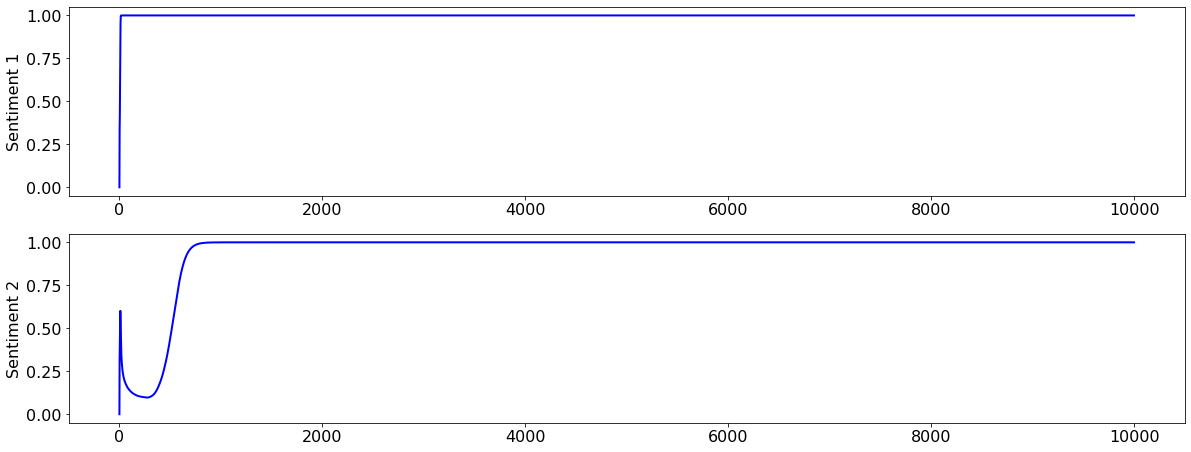

In [9]:
cols = dataset.columns
norms = pd.DataFrame({cols[0]: N[:, 0], cols[1]: N[:, 1], cols[2]: N[:, 2], cols[3]: N[:, 3]})

plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})
cols = norms.columns
for i in range(2):
    plt.subplot(4, 1, i+1)
    plt.ylabel('Sentiment {}'.format(i+1))
    plt.plot(norms[cols[i]].iloc[0:10000], lw=2, color='b')
plt.show()

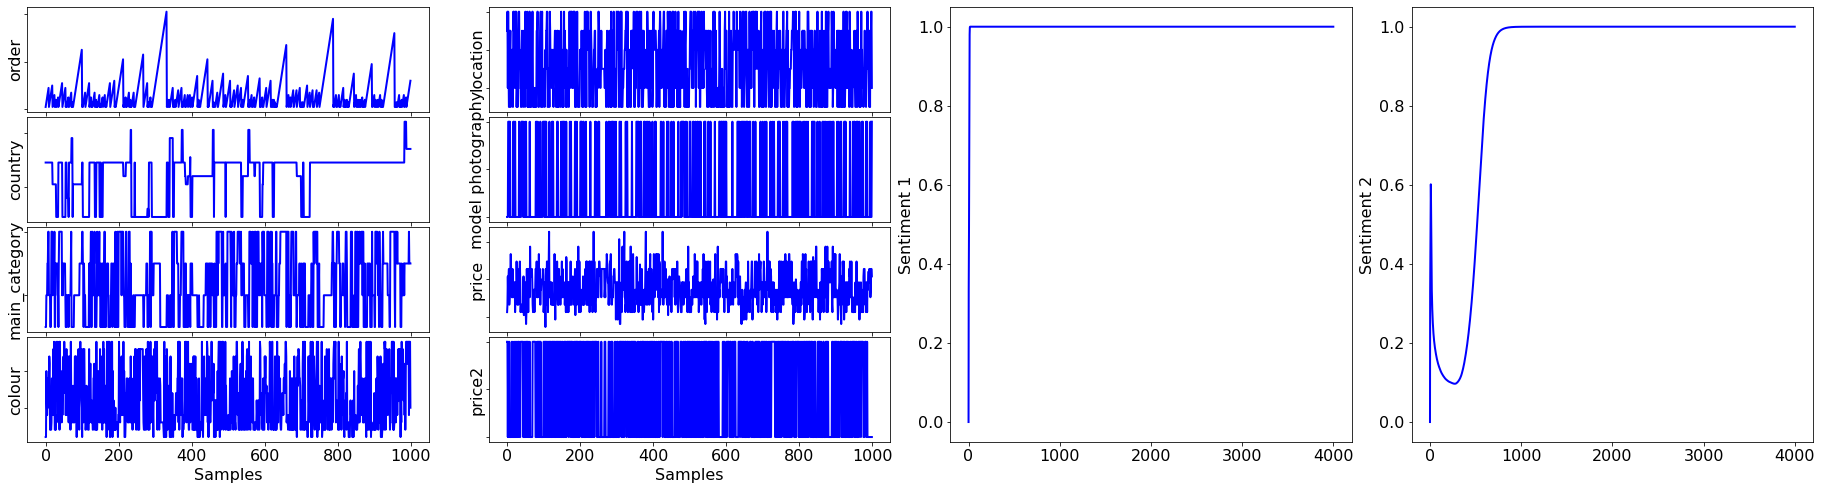

In [11]:
# Plot for Figure 1.11

fig = plt.figure(figsize=(32, 8))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns

grid = plt.GridSpec(4, 4, wspace=0.15, hspace=0.05)

ax1 = fig.add_subplot(grid[0, 0])
plt.ylabel(cols[0])
plt.plot(dataset[cols[0]].iloc[0:1000], lw=2, color='b')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax1.get_yticklabels(), visible=False)

ax2 = fig.add_subplot(grid[1, 0], sharex=ax1)
plt.ylabel(cols[1])
plt.plot(dataset[cols[1]].iloc[0:1000], lw=2, color='b')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = fig.add_subplot(grid[2, 0], sharex=ax1)
plt.ylabel(cols[2])
plt.plot(dataset[cols[2]].iloc[0:1000], lw=2, color='b')
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = fig.add_subplot(grid[3, 0], sharex=ax1)
plt.ylabel(cols[3])
plt.plot(dataset[cols[3]].iloc[0:1000], lw=2, color='b')
plt.setp(ax4.get_xticklabels(), visible=True)
plt.setp(ax4.get_yticklabels(), visible=False)
plt.xlabel('Samples')

ax5 = fig.add_subplot(grid[0, 1], sharex=ax1)
plt.ylabel(cols[4])
plt.plot(dataset[cols[4]].iloc[0:1000], lw=2, color='b')
plt.setp(ax5.get_xticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)

ax6 = fig.add_subplot(grid[1, 1], sharex=ax1)
plt.ylabel(cols[5])
plt.plot(dataset[cols[5]].iloc[0:1000], lw=2, color='b')
plt.setp(ax6.get_xticklabels(), visible=False)
plt.setp(ax6.get_yticklabels(), visible=False)

ax7 = fig.add_subplot(grid[2, 1], sharex=ax1)
plt.ylabel(cols[6])
plt.plot(dataset[cols[6]].iloc[0:1000], lw=2, color='b')
plt.setp(ax7.get_xticklabels(), visible=False)
plt.setp(ax7.get_yticklabels(), visible=False)

ax8 = fig.add_subplot(grid[3, 1], sharex=ax1)
plt.ylabel(cols[7])
plt.plot(dataset[cols[7]].iloc[0:1000], lw=2, color='b')
plt.setp(ax8.get_xticklabels(), visible=True)
plt.setp(ax8.get_yticklabels(), visible=False)
plt.xlabel('Samples')

ax9 = fig.add_subplot(grid[0:, 2])
plt.ylabel('Sentiment {}'.format(1))
plt.plot(norms[cols[0]].iloc[0:4000], lw=2, color='b')
plt.setp(ax9.get_xticklabels(), visible=True)
plt.setp(ax9.get_yticklabels(), visible=True)

ax10 = fig.add_subplot(grid[0:, 3])
plt.ylabel('Sentiment {}'.format(2))
plt.plot(norms[cols[1]].iloc[0:4000], lw=2, color='b')
plt.setp(ax10.get_xticklabels(), visible=True)
plt.setp(ax10.get_yticklabels(), visible=True)

plt.show()
